In [74]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# Set visualization style
sns.set(style="whitegrid")

In [78]:
### LOAD TRANSACTION DATASET ###
transaction_df = pd.read_csv("transaction_data.csv")
transaction_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [80]:
# Display basic info and first few rows
print("Transaction Dataset Info:")
print(transaction_df.info(), "\n")
print(transaction_df.head(), "\n")

Transaction Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None 

    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038      

In [120]:
# Debugging: Print column names to ensure correct names
print("Columns in dataset:", transaction_df.columns)
print("Dataset Shape:", transaction_df.shape)

Columns in dataset: Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')
Dataset Shape: (264836, 8)



Error: Required columns not found in the dataset! Check column names.

Top 5 Most Loyal Customers:
   Customer_ID  Transaction_Count
0       172032                 18
1       162039                 18
2       230078                 17
3       128178                 17
4        13138                 17


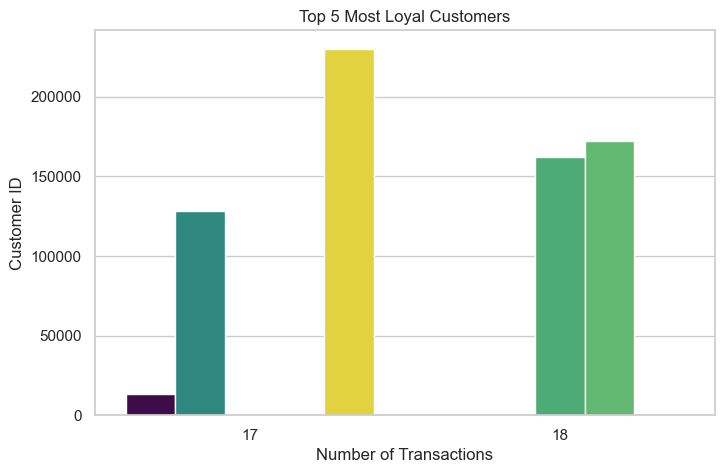

"\nBased on the analysis, the most loyal customers likely prefer certain products due to:\n- Consistent product quality and availability.\n- Discounts, loyalty points, or premium services.\n- The product's relevance to their lifestyle (e.g., health-conscious, premium buyers).\n- Emotional connection to a brand.\n\nTo refine this, we could analyze:\n- The specific products these loyal customers buy.\n- Any discounts or promotions they frequently use.\n"

In [122]:
### BESTSELLING PRODUCTS ANALYSIS ###
# Ensure correct column names
required_columns = {"PRODUCT_NAME", "REVENUE"}
actual_columns = set(transaction_df.columns)

if required_columns.issubset(actual_columns):
    # Convert REVENUE to numeric if necessary
    transaction_df["REVENUE"] = pd.to_numeric(transaction_df["REVENUE"], errors="coerce")
    
    # Group by product and calculate total revenue
    top_products = transaction_df.groupby("PRODUCT_NAME")["REVENUE"].sum().reset_index()
    top_products = top_products.sort_values(by="REVENUE", ascending=False).head(3)

    print("\nTop 3 Most Profitable Products:")
    print(top_products)

    # Plot the bestselling products
    plt.figure(figsize=(8,5))
    sns.barplot(x="REVENUE", y="PRODUCT_NAME", data=top_products, palette="coolwarm")
    plt.title("Top 3 Most Profitable Products")
    plt.xlabel("Total Revenue")
    plt.ylabel("Product Name")
    plt.show()
else:
    print("\nError: Required columns not found in the dataset! Check column names.")

### CUSTOMER LOYALTY ANALYSIS ###
# Identifying the most loyal customers
if "LYLTY_CARD_NBR" in transaction_df.columns:
    loyal_customers = transaction_df["LYLTY_CARD_NBR"].value_counts().reset_index()
    loyal_customers.columns = ["Customer_ID", "Transaction_Count"]
    
    # Get top 5 most loyal customers
    top_loyal_customers = loyal_customers.head(5)
    
    print("\nTop 5 Most Loyal Customers:")
    print(top_loyal_customers)

    # Plot loyal customers
    plt.figure(figsize=(8,5))
    sns.barplot(x="Transaction_Count", y="Customer_ID", data=top_loyal_customers, hue="Customer_ID", palette="viridis", legend=False)
    plt.title("Top 5 Most Loyal Customers")
    plt.xlabel("Number of Transactions")
    plt.ylabel("Customer ID")
    plt.show()
else:
    print("\nError: 'LYLTY_CARD_NBR' column not found in the dataset!")

### HYPOTHESIS ON LOYAL CUSTOMERS ###
"""
Based on the analysis, the most loyal customers likely prefer certain products due to:
- Consistent product quality and availability.
- Discounts, loyalty points, or premium services.
- The product's relevance to their lifestyle (e.g., health-conscious, premium buyers).
- Emotional connection to a brand.

To refine this, we could analyze:
- The specific products these loyal customers buy.
- Any discounts or promotions they frequently use.
"""